In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Carregamento dos dados


In [2]:
df_dsa = pd.read_csv("dataset.csv")


In [3]:
df_dsa.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [4]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df_dsa.isnull().sum()

Data            0
Total_Vendas    0
dtype: int64

In [6]:
df_dsa.shape


(365, 2)

In [7]:
df_dsa.columns

Index(['Data', 'Total_Vendas'], dtype='object')

#  Pré Processamento dos dados

In [8]:
df_dsa["Data"] =pd.to_datetime(df_dsa["Data"])

In [9]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [10]:
# data minima
df_dsa["Data"].min()

Timestamp('2023-01-01 00:00:00')

In [11]:
# data maxima
df_dsa["Data"].max()

Timestamp('2023-12-31 00:00:00')

In [12]:
# define serie temporal
serie_temporal = df_dsa.set_index("Data")["Total_Vendas"]

In [13]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [14]:
type(serie_temporal)

pandas.core.series.Series

In [15]:
# frequencia das datas
serie_temporal = serie_temporal.asfreq("D")

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

# Analise exploratoria


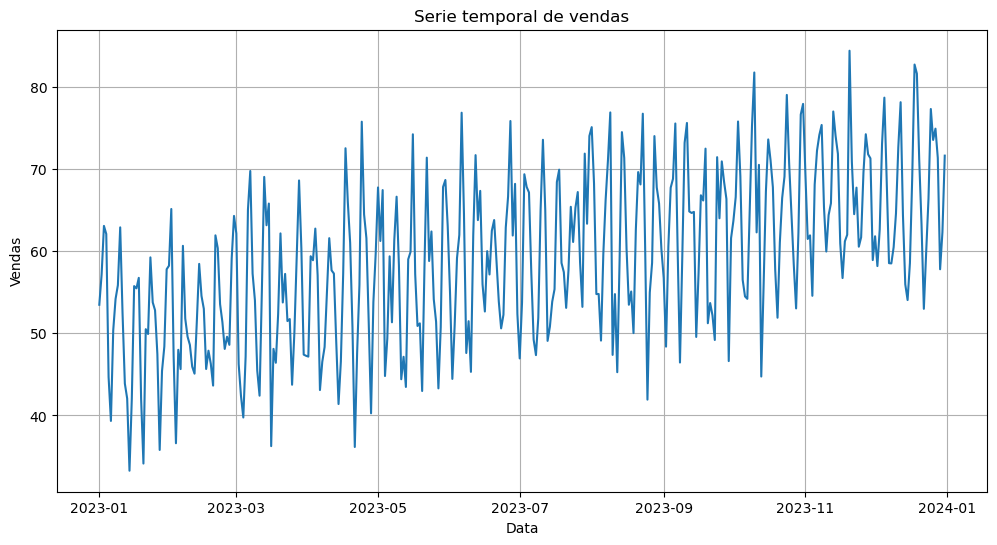

In [17]:
# Grafico de serie temporal sem formatação
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Serie temporal de vendas")
plt.grid(True)
plt.show()

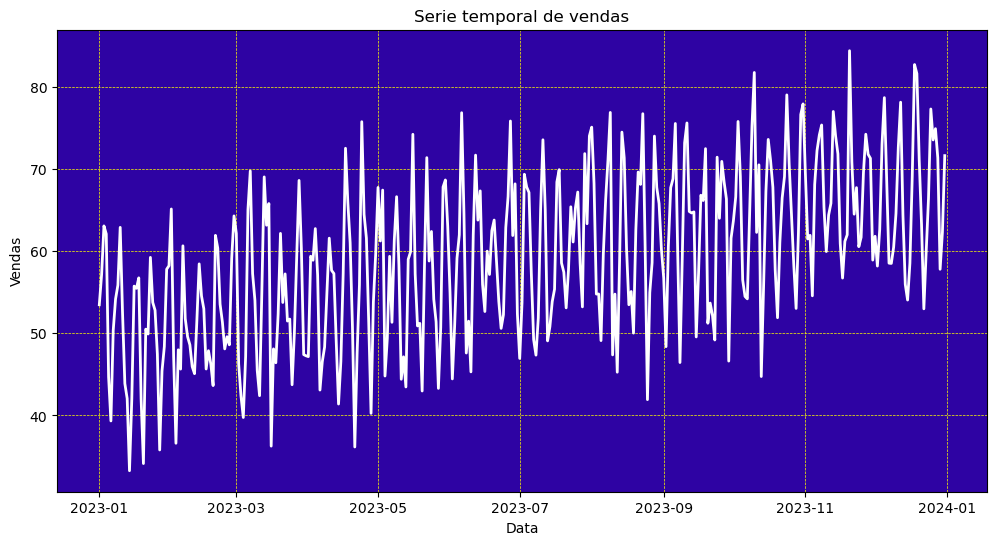

In [18]:
# Grafico formatado
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color="white", linewidth= 2)
# cores e estilo
plt.gca().set_facecolor("#2e03a3")
plt.grid(color="yellow", linestyle = "--", linewidth=0.5)

# Rotulos dos eixos
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Serie temporal de vendas")

# cores dos eixos dos marcadores
plt.tick_params(axis = 'x', colors="black")
plt.tick_params(axis = 'y', colors="black")

plt.show()

# Suavização Exponencial

In [22]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [23]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

C:\Users\Leo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [24]:
#valores previstos pelo modelo
suavizacao_exponenecial = modelo_ajustado.fittedvalues

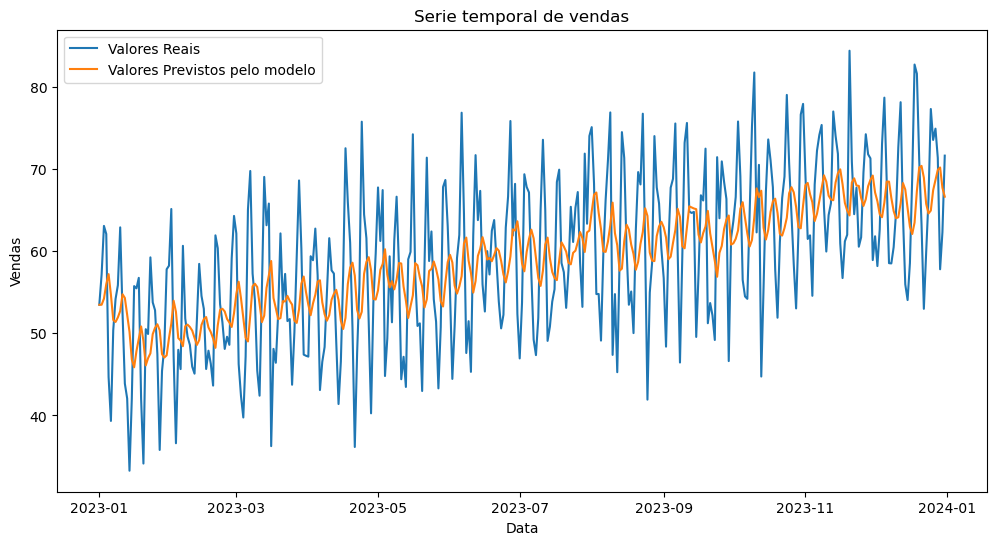

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Valores Reais")
plt.plot(suavizacao_exponenecial, label="Valores Previstos pelo modelo")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Serie temporal de vendas")
plt.legend()
plt.show()

# Previões futuras forecast

In [26]:
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [29]:
print("Previsão to total de vendas para janeiro de 2024", round(previsoes[0], 3))

Previsão to total de vendas para janeiro de 2024 67.65
